In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.base import clone
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import beta, expon


In [2]:
df = pd.read_csv('Cancer_Data 2.csv')

## EDA

In [3]:
df.shape

(569, 33)

### Check dupliacated rows

In [4]:
df.loc[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(columns = ['id','Unnamed: 32'])

In [7]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 31 entries, diagnosis to fractal_dimension_worst
dtypes: float64(30), object(1)
memory usage: 137.9+ KB


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


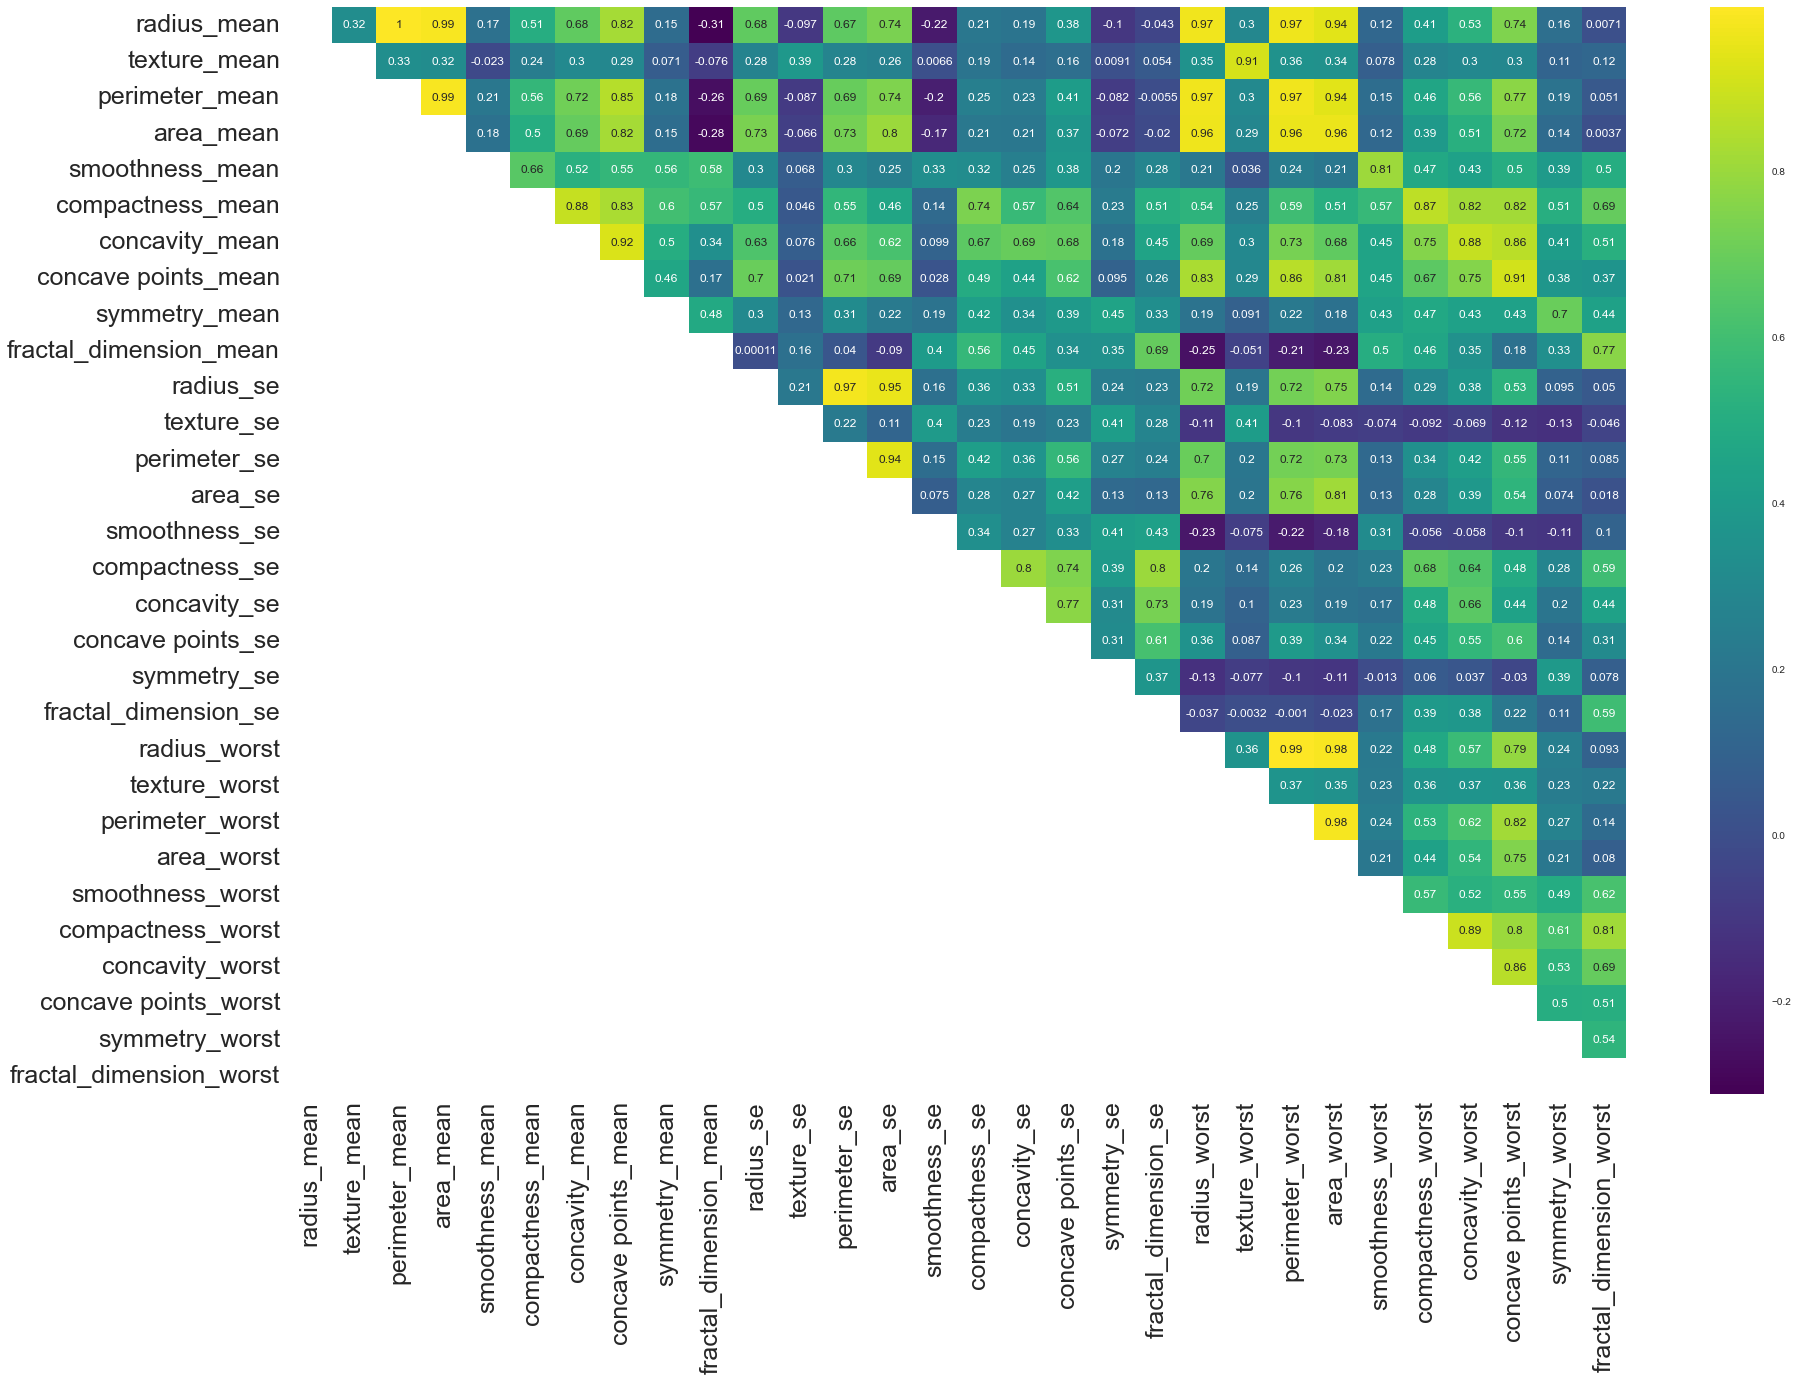

In [9]:

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='viridis',annot=True,mask = np.tril(np.ones_like(df.corr(), dtype=bool)))
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25,rotation=0)
plt.show()

B    357
M    212
Name: diagnosis, dtype: int64

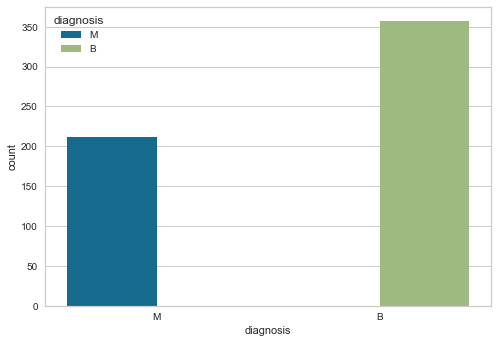

In [10]:
sns.countplot(x='diagnosis',hue='diagnosis',data = df)
df['diagnosis'].value_counts()

In [11]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})

In [12]:
features = list(df.columns[1:32])
featuresdf = df[features]
target = df['diagnosis']

### Visulization for mutual information ( relationship bewteen target variable)

In [13]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = featuresdf.dtypes == int
mi_scores = mutual_info_regression(featuresdf, target, discrete_features= discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=featuresdf.columns)
mi_scores = mi_scores.sort_values(ascending=False)

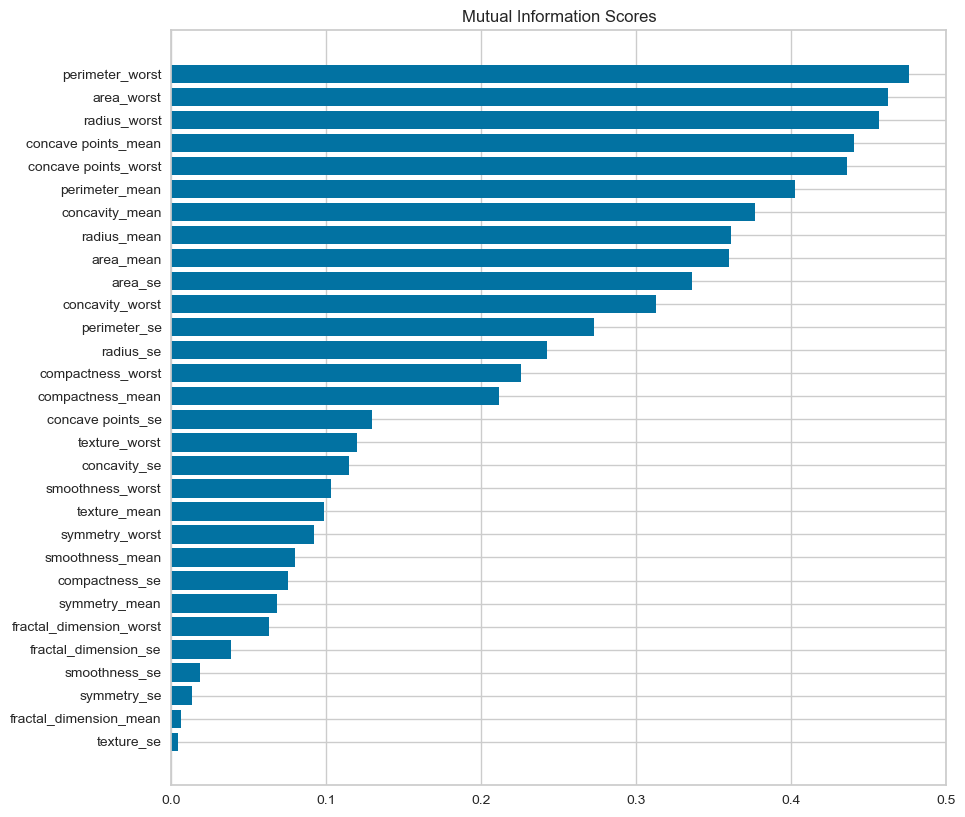

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)


### Check if any of the feature contains too many zeros

In [15]:
overfit = []
for i in df.columns:
    counts = df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df) * 100 > 99:
        overfit.append(i)

print(overfit)

[]


### Model

In [16]:
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

In [17]:
from sklearn.metrics import accuracy_score
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=2022, test_size=0.2)
def classification_metrics(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_val = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_val = accuracy_score(y_test, pred_val)
    return accuracy_train, accuracy_val


In [18]:
models = [LogisticRegression(random_state=42), KNeighborsClassifier(),
          SVC(probability=True, random_state=42),
           RandomForestClassifier(random_state=42),
          xgb.XGBClassifier(), AdaBoostClassifier(),]

model_names = ['LogisticRegression', 'KNN', 'SVM', 'RandomForest',
               'XGBoost', 'AdaBoostClassifier']

for name, model in zip(model_names, models):
    accuracy_train, accuracy_val = classification_metrics(model, x_train, x_val, y_train, y_val)
    print(f'{name}:')
    print(f'　　Training Accuracy: {accuracy_train:.4f}, Validation Accuracy: {accuracy_val:.4f}')



LogisticRegression:
　　Training Accuracy: 0.9495, Validation Accuracy: 0.9211
KNN:
　　Training Accuracy: 0.9451, Validation Accuracy: 0.9298
SVM:
　　Training Accuracy: 0.9187, Validation Accuracy: 0.9123
RandomForest:
　　Training Accuracy: 1.0000, Validation Accuracy: 0.9737
XGBoost:
　　Training Accuracy: 1.0000, Validation Accuracy: 0.9561
AdaBoostClassifier:
　　Training Accuracy: 1.0000, Validation Accuracy: 0.9649


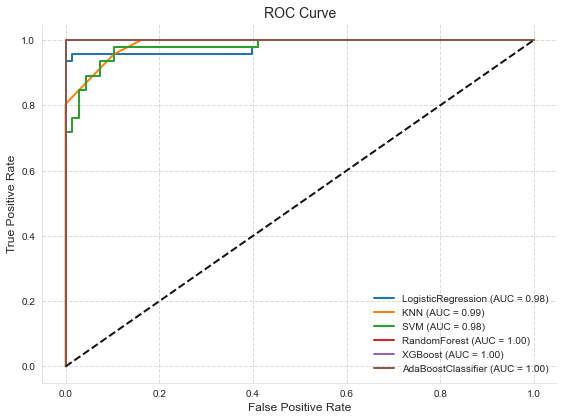

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, x_test, y_test, model_name, color):
    y_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, color=color, label=f'{model_name} (AUC = {auc_score:.2f})', linewidth=2)

plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

for i, (name, model) in enumerate(zip(model_names, models)):
    model.fit(x_val, y_val)
    plot_roc_curve(model, x_val, y_val, name, colors[i])
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.tight_layout()
plt.show()



## Model Tuning 

In [20]:
def fitGridModel(model, params, x_train, y_train, x_val, y_val):

    reg_model = clone(model)
    best_params = {}

    # Use accuracy_score for classification tasks
    scorer = make_scorer(accuracy_score)
    
    grid = RandomizedSearchCV(reg_model,
                              param_distributions=params,
                              scoring=scorer,
                              cv=5,
                              n_iter=10,
                              n_jobs=-1,
                              random_state=2022,
                              verbose=1)
    grid.fit(x_train, y_train)
    score_train = grid.best_score_
    
    # Evaluate on validation set
    pred_val = grid.predict(x_val)
    score_val = accuracy_score(y_val, pred_val)
    
    print("Training accuracy of best model: {:.4f}".format(score_train))
    print("Validation accuracy of best model: {:.4f}".format(score_val))
    
    best_params = grid.best_params_
    print("The parameter setting of optimized model:", grid.best_estimator_)

    return score_train, score_val, best_params, grid





### Logistic Regression

In [25]:
from scipy.stats import uniform, randint
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.01, 100.0),
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': randint(1000, 2000),
    'class_weight': [None, 'balanced'],
    'random_state': [27]
}

# Assuming the `fitGridModel` function performs the grid search and returns the best model.
log_score_train, log_score_val, log_params, log_grid_model = fitGridModel(LogisticRegression(), params=param_grid, x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/wutingkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wutingkang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Training accuracy of best model: 0.9626
Validation accuracy of best model: 0.9825
The parameter setting of optimized model: LogisticRegression(C=49.493762988528765, max_iter=1097, penalty='l1',
                   random_state=27, solver='liblinear')


## KNN 

In [26]:
import warnings
from sklearn.exceptions import DataConversionWarning
# Define the parameter grid with specific values for each hyperparameter for KNN
warnings.filterwarnings("ignore", category=DataConversionWarning)

param_grid = {
    'n_neighbors': randint(3, 12),           # Integer range from 3 to 11 (12 is exclusive)
    'weights': ['uniform', 'distance'],      # Categorical values (choose from uniform and distance)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Categorical options
    'p': [1, 2]                             # Categorical values (choose from 1 and 2)
}
# Assuming the `fitGridModel` function performs the grid search and returns the best model.
knn_score_train,knn_score_val, knn_params, knn_grid_model = fitGridModel(KNeighborsClassifier(), params=param_grid, x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy of best model: 0.9473
Validation accuracy of best model: 0.9386
The parameter setting of optimized model: KNeighborsClassifier(n_neighbors=3, p=1)


## Random Forest

In [27]:
param_grid = {
    'n_estimators': randint(100, 1000),      # Integer range from 100 to 999 (1000 is exclusive)
    'criterion': ['gini', 'entropy'],        # Categorical values (choose from gini and entropy)
    'max_depth': randint(3, 12),     # Integer values and None (no maximum depth)
    'min_samples_split': randint(2, 11),     # Integer range from 2 to 10 (11 is exclusive)
    'min_samples_leaf': randint(1, 11),      # Integer range from 1 to 10 (11 is exclusive)
    'random_state': [27]
}
rf_score_train,rf_score_val,rf_params, rf_grid_model = fitGridModel(RandomForestClassifier(), params=param_grid,x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy of best model: 0.9538
Validation accuracy of best model: 0.9649
The parameter setting of optimized model: RandomForestClassifier(max_depth=6, min_samples_leaf=2, n_estimators=369,
                       random_state=27)


## XGboost

In [30]:
                                                     params_grid={
                                                         'objective': ['reg:squarederror'],
                                                         'learning_rate': beta(a=2, b=20, loc=0, scale=0.1),
                                                         'n_estimators': randint(low=2500, high=3500),
                                                         'gamma': beta(a=2,b=20, loc=0, scale=0.01),
                                                         'colsample_bytree': uniform(loc=0.6, scale=0.2),
                                                         'subsample': uniform(loc=0.6, scale=0.2),
                                                         'max_depth': [2, 3],
                                                         'min_child_weight': [0, 1, 2],
                                                        
                                                         'seed': [27],
                                                         'scale_pos_weight': [1],
                                                         'reg_alpha': beta(a=2, b=20, loc=0, scale=0.0001)
                                                     }
xgb_score_train,xgb_score_val,xgb_params, xgb_grid_model = fitGridModel(xgb.XGBClassifier(), params=params_grid,x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy of best model: 0.9626
Validation accuracy of best model: 0.9649
The parameter setting of optimized model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7768814876233973, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0007335238965449515, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007126467712454208, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=2919, n_jobs=None, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, .

## Adaboost

In [35]:
params_grid = {
    'n_estimators': randint(1000, 2000),
    'learning_rate': expon(loc=0, scale=0.1),
    'base_estimator': [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=5)],
    'random_state': [27]
}

# Assuming the `fitGridModel` function performs the grid search and returns the best model.
ada_score_train,ada_score_val,ada_params, ada_grid_model = fitGridModel(AdaBoostClassifier(), params=params_grid,x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy of best model: 0.9473
Validation accuracy of best model: 0.9825
The parameter setting of optimized model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.037630458809915765, n_estimators=1976,
                   random_state=27)


### SVM

In [36]:
from sklearn.svm import SVC
from scipy.stats import randint, expon
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'C': expon(loc=0, scale=1),         
    'kernel': ['linear', 'rbf', 'sigmoid'],  
    'gamma': expon(loc=0, scale=1),    
    'class_weight': [None, 'balanced'],
    'random_state': [27]
}

# Assuming the `fitGridModel` function performs the grid search and returns the best model.
svc_score_train, svc_score_val, svc_params, svc_grid_model = fitGridModel(SVC(), params=params_grid, x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training accuracy of best model: 0.9516
Validation accuracy of best model: 0.9386
The parameter setting of optimized model: SVC(C=0.051265945474830696, gamma=0.054724072037232625, kernel='linear',
    random_state=27)


## Ensemble (Voting)

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [41]:
from sklearn.ensemble import VotingClassifier

models = [
    ('ada', ada_grid_model.best_estimator_),  
    ('XGB', xgb_grid_model.best_estimator_),
    ('SVC', svc_grid_model.best_estimator_)
]

# Create the voting ensemble classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Fit the voting ensemble on the training data
voting_classifier.fit(x_train, y_train)

# Make predictions using the voting classifier on the test data
voting_predictions = voting_classifier.predict(x_val)

# Calculate the accuracy of the voting classifier
accuracy = accuracy_score(y_val, voting_predictions)
print("Training accuracy", accuracy)


Training accuracy 0.9824561403508771


In [42]:

pip install numpy==1.21


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## SHAP

In [43]:
import shap
shap.initjs()

In [44]:
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=2022, test_size=0.2)
xgbr = xgb.XGBClassifier(**xgb_params)
xgbr.fit(X_train, y_train)
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer(X_val)

### Waterfall Plot

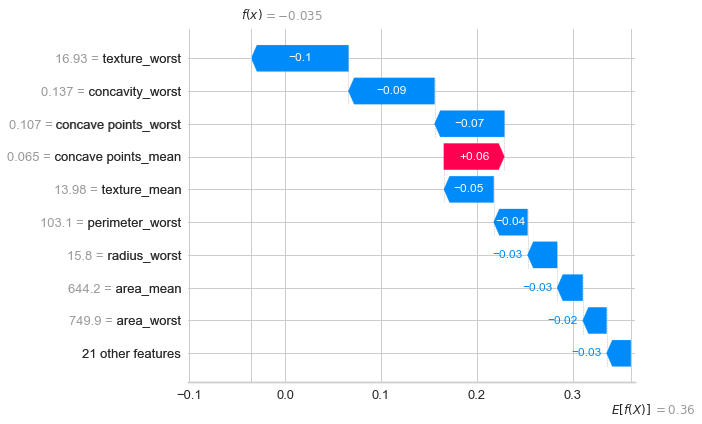

In [51]:
shap.plots.waterfall(shap_values[0])

Input variables are rank from top to bottom, by how much impact on the model performance. The blue arrows correspond to input variable push the model toward a lower value and red arrow correspond to input variable push the model toward a higher value. 

### Force Plot

In [48]:
shap.plots.force(shap_values[0])

### Beeswarm plot

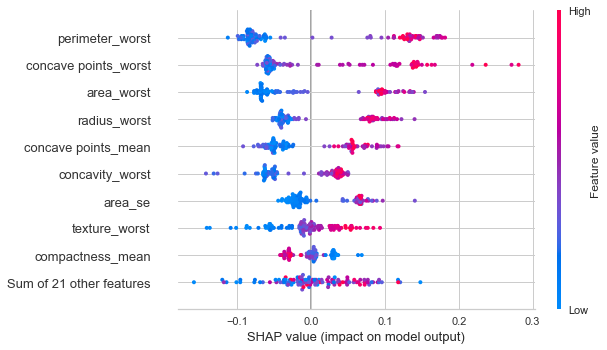

In [52]:
shap.plots.beeswarm(shap_values)